Get current working directory.

In [1]:
import os 
orig_dir = os.getcwd()

Import libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from src.recognition.svm import SVM

Load data and labels.

In [3]:
samples_path = 'datasets/landmarks.txt'
labels_path = 'datasets/valences.txt'

X = np.loadtxt(samples_path, dtype=np.float32)
y = np.loadtxt(labels_path).astype(int)

Let's see how sample data is represented... 

In [4]:
Xdf = pd.DataFrame(X)
print(Xdf.head())

      0     1      2     3      4     5      6     7      8     9   ...  \
0  400.0  67.0  407.0  62.0  416.0  61.0  425.0  67.0  416.0  70.0  ...   
1  400.0  67.0  407.0  62.0  416.0  61.0  424.0  67.0  416.0  71.0  ...   
2  400.0  67.0  407.0  62.0  416.0  61.0  424.0  67.0  416.0  71.0  ...   
3  400.0  68.0  407.0  62.0  416.0  61.0  424.0  67.0  416.0  71.0  ...   
4  400.0  67.0  406.0  62.0  416.0  62.0  424.0  67.0  416.0  71.0  ...   

      54     55     56     57     58     59     60     61     62     63  
0  452.0  130.0  467.0  133.0  452.0  140.0  446.0  141.0  439.0  140.0  
1  451.0  131.0  467.0  134.0  452.0  142.0  446.0  143.0  439.0  142.0  
2  451.0  132.0  467.0  135.0  453.0  145.0  446.0  146.0  439.0  146.0  
3  452.0  132.0  467.0  136.0  453.0  146.0  446.0  148.0  439.0  147.0  
4  452.0  132.0  468.0  135.0  453.0  145.0  447.0  146.0  439.0  146.0  

[5 rows x 64 columns]


...and the same for responses.

In [5]:
ydf = pd.DataFrame(y)
print(ydf.head())

   0
0  1
1  1
2  1
3  1
4  1


Split data in train and test. 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

See sample data's distribution.

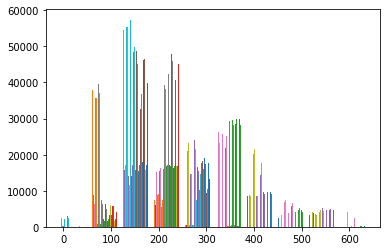

In [7]:
plt.hist(X_train)
plt.show()

See response data's distribution

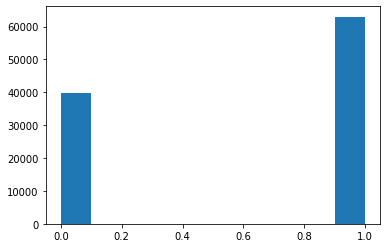

In [8]:
plt.hist(y_train)
plt.show()

Initialize classifiers, one for $\textit{scikit-learn}$ and one for $\textit{OpenCV}$.


In [9]:
rec_skl = SVM('skl')
svm_skl = rec_skl.load('datasets/svm.yml')

rec_cv2 = SVM('cv2', kernel='2')
svm_cv2 = rec_cv2.load('datasets/svm_cv2.yml')

Predict data 

In [10]:
prediction_skl = rec_skl.predict(svm_skl, X_test)
prediction_cv2 = rec_cv2.predict(svm_cv2, X_test)[1].astype(np.int).flatten()

data_skl = [ [p, a] for p,a in zip(y_test, prediction_skl)]
data_cv2 = [ [p, a] for p,a in zip(y_test, prediction_cv2)]

df_skl = pd.DataFrame(data_skl, columns=['Actual', 'Predicted'])
df_cv2 = pd.DataFrame(data_cv2, columns=['Actual', 'Predicted'])

Prediction for the $\textit{scikit-learn}$ SVM classifier

In [11]:
print(df_skl.head())

   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       1          1


Prediction for the $\textit{OpenCV}$ SVM classifier.

In [12]:
print(df_cv2.head())

   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       1          0


Confusion matrixes.

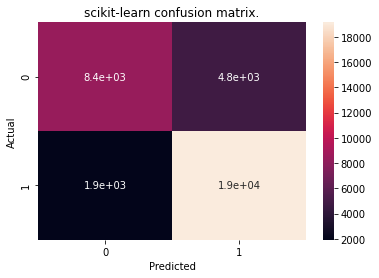

Accuracy: 0.805
Precision: 0.814
Recall: 0.639
F1: 0.358


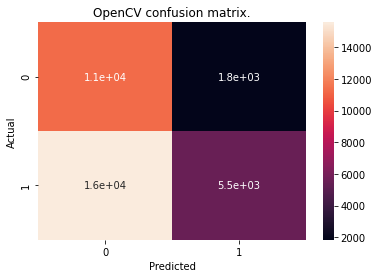

Accuracy: 0.491
Precision: 0.421
Recall: 0.860
F1: 0.283


In [13]:
n = y_test.shape[0]

confusion_matrix_skl = pd.crosstab(df_skl['Actual'], df_skl['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_skl, annot=True)
plt.title('scikit-learn confusion matrix.')
plt.show()

tp_skl = confusion_matrix_skl[0][0]
fp_skl = confusion_matrix_skl[0][1]
fn_skl = confusion_matrix_skl[1][0]
tn_skl = confusion_matrix_skl[1][1]

acc_skl = (tp_skl + tn_skl)/n
pre_skl = tp_skl/(tp_skl + fp_skl) 
rec_skl = tp_skl/(tp_skl + fn_skl)
f1_skl = 1/(1/pre_skl + 1/rec_skl)

print("Accuracy: {:.3f}".format(acc_skl))
print("Precision: {:.3f}".format(pre_skl))
print("Recall: {:.3f}".format(rec_skl))
print("F1: {:.3f}".format(f1_skl))

confusion_matrix_cv2 = pd.crosstab(df_cv2['Actual'], df_cv2['Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_cv2, annot=True)
plt.title('OpenCV confusion matrix.')
plt.show()

tp_cv2 = confusion_matrix_cv2[0][0]
fp_cv2 = confusion_matrix_cv2[0][1]
fn_cv2 = confusion_matrix_cv2[1][0]
tn_cv2 = confusion_matrix_cv2[1][1]

acc_cv2 = (tp_cv2 + tn_cv2)/n
pre_cv2 = tp_cv2 / (tp_cv2+fp_cv2) 
rec_cv2 = tp_cv2 / (tp_cv2 + fn_cv2)
f1_cv2 = 1/(1/pre_cv2 + 1/rec_cv2)

plt.show()

print("Accuracy: {:.3f}".format(acc_cv2))
print("Precision: {:.3f}".format(pre_cv2))
print("Recall: {:.3f}".format(rec_cv2))
print("F1: {:.3f}".format(f1_cv2))

ROC curves and AUC.

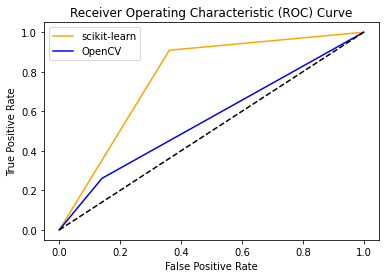

AUC
scikit-learn: 0.774
OpenCV: 0.560


In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_skl, tpr_skl, ths_skl = roc_curve(y_test, prediction_skl)
fpr_cv2, tpr_cv2, ths_cv2 = roc_curve(y_test, prediction_cv2)

auc_skl = auc(fpr_skl, tpr_skl)
auc_cv2 = auc(fpr_cv2, tpr_cv2)

plt.plot(fpr_skl, tpr_skl, color='orange', label="scikit-learn")
plt.plot(fpr_cv2, tpr_cv2, color='blue', label="OpenCV")

plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print('AUC')
print("scikit-learn: {:.3f}".format(auc_skl))
print("OpenCV: {:.3f}".format(auc_cv2))

EER for the $\textit{scikit-learn}$ SVM classifier.

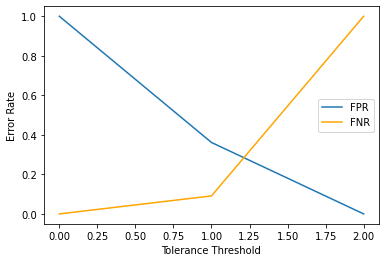

In [15]:
fnr_skl = 1 - tpr_skl

plt.plot(ths_skl, fpr_skl, label='FPR')
plt.plot(ths_skl, fnr_skl, label='FNR', color='orange')
plt.xlabel('Tolerance Threshold')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

DET curve

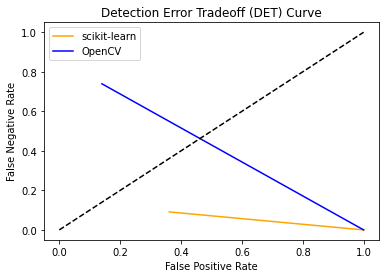

In [16]:
from sklearn.metrics import det_curve

fpr_skl, fnr_skl, ths_skl = det_curve(y_test, prediction_skl)
fpr_cv2, fnr_cv2, ths_cv2 = det_curve(y_test, prediction_cv2)

plt.plot(fpr_skl, fnr_skl, color='orange', label="scikit-learn")
plt.plot(fpr_cv2, fnr_cv2, color='blue', label="OpenCV")

plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('Detection Error Tradeoff (DET) Curve')
plt.legend()
plt.show()